In [112]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import re

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [86]:
users_df = pd.read_csv('/Users/kevenlemoing/Sites/Lifesum_assignement/data/users.csv',error_bad_lines=False)

In [87]:
users_df.head()

,user_id,start_date,height_cm,age,country,language,gender,timezone,goal_weight_kg
0,24822001,2017-09-14,NaN,18.0,BR,pt,f,-03:00,178.7
1,23529201,2017-07-12,50.0,23.0,NL,nl,m,NaN,50.0
2,24352001,2017-08-21,50.0,20.0,US,en,f,NaN,57.2
3,23379001,2017-07-05,52.0,26.0,GB,en,f,Asia/Calcutta,33.1
4,24776001,2017-09-12,52.0,23.0,CA,en,f,America/Toronto,70.0


In [58]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5810 entries, 0 to 5809
Data columns (total 9 columns):
user_id           5810 non-null int64
start_date        5810 non-null object
height_cm         5809 non-null float64
age               5810 non-null float64
country           5808 non-null object
language          5810 non-null object
gender            5810 non-null object
timezone          5348 non-null object
goal_weight_kg    5810 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 408.6+ KB


# First data cleaning

1) About NaN values

The first option is to drop each row which contains a NaN value.

In [43]:
#First option -> using dropna function
print(len(users_df.index) - len(users_df.dropna().index))

464


We get 464 rows left. 
It's raisonable but let's apply the second option where we can keep the entire datasets 

It's about replacing NaN values by a blank.

In [44]:
#Second option 
#users_df = users_df.fillna('')
#users_df = users_df.dropna()
#users_df.head()

In [88]:
#Convert "age" column to int type
users_df['age'] = users_df['age'].astype(int)

In [89]:
#Convert "start_date" column to datetime type
users_df['start_date'] = pd.to_datetime(users_df['start_date'])

In [ ]:
#Convert "timezone" column to datetime type

In [76]:
#import ast
#ast.literal_eval(users_df['country'])
#import json
#json.loads(users_df['country'])

In [95]:
#Convert "country", "language", "gender" to string type

#str(users_df['country'])
users_df['gender_to_be_parsed'] = users_df['gender'].to_string()

#users_df['country'] = users_df['country'].astype(str)
#users_df['language'] = users_df['language'].astype(str)
#users_df['gender'] = users_df['gender'].astype(str)

In [81]:
users_df['country'].dtype

dtype('O')

In [91]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5810 entries, 0 to 5809
Data columns (total 10 columns):
user_id                 5810 non-null int64
start_date              5810 non-null datetime64[ns]
height_cm               5809 non-null float64
age                     5810 non-null int64
country                 5808 non-null object
language                5810 non-null object
gender                  5810 non-null object
timezone                5348 non-null object
goal_weight_kg          5810 non-null float64
country_to_be_parsed    5810 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 454.0+ KB


In [92]:
users_df.head()

,user_id,start_date,height_cm,age,country,language,gender,timezone,goal_weight_kg,country_to_be_parsed
0,24822001,2017-09-14,NaN,18,BR,pt,f,-03:00,178.7,0 BR\n1 NL\n2 US\n3 ...
1,23529201,2017-07-12,50.0,23,NL,nl,m,NaN,50.0,0 BR\n1 NL\n2 US\n3 ...
2,24352001,2017-08-21,50.0,20,US,en,f,NaN,57.2,0 BR\n1 NL\n2 US\n3 ...
3,23379001,2017-07-05,52.0,26,GB,en,f,Asia/Calcutta,33.1,0 BR\n1 NL\n2 US\n3 ...
4,24776001,2017-09-12,52.0,23,CA,en,f,America/Toronto,70.0,0 BR\n1 NL\n2 US\n3 ...


In [97]:
users_df['country_to_be_parsed'][0]

u'0        BR\n1        NL\n2        US\n3        GB\n4        CA\n5        AU\n6        NZ\n7        AF\n8        PR\n9        GB\n10       PH\n11       SA\n12       AE\n13       GB\n14       CA\n15       VN\n16       DK\n17       AU\n18       PR\n19       GB\n20       FR\n21       GB\n22       CA\n23       DZ\n24       MX\n25       FR\n26       US\n27       GB\n28       MA\n29       IT\n30       SA\n31       GB\n32       DE\n33       BE\n34       FR\n35       ES\n36       RU\n37       RU\n38       GB\n39       GB\n40       RU\n41       VN\n42       US\n43       US\n44       ES\n45       IT\n46       IT\n47       IT\n48       EG\n49       DE\n50       DE\n51       IE\n52       ES\n53       RU\n54       RU\n55       CA\n56       AU\n57       CA\n58       AU\n59       AU\n60       GB\n61       NL\n62       BR\n63       BR\n64       CA\n65       DK\n66       AU\n67       US\n68       GB\n69       US\n70       US\n71       IT\n72       US\n73       RU\n74       IT\n75       RU\n76       A

In [114]:
value = users_df['country_to_be_parsed'][0]
value_parsed = re.split(" +", value)
value_parsed

[u'0',
 u'BR\n1',
 u'NL\n2',
 u'US\n3',
 u'GB\n4',
 u'CA\n5',
 u'AU\n6',
 u'NZ\n7',
 u'AF\n8',
 u'PR\n9',
 u'GB\n10',
 u'PH\n11',
 u'SA\n12',
 u'AE\n13',
 u'GB\n14',
 u'CA\n15',
 u'VN\n16',
 u'DK\n17',
 u'AU\n18',
 u'PR\n19',
 u'GB\n20',
 u'FR\n21',
 u'GB\n22',
 u'CA\n23',
 u'DZ\n24',
 u'MX\n25',
 u'FR\n26',
 u'US\n27',
 u'GB\n28',
 u'MA\n29',
 u'IT\n30',
 u'SA\n31',
 u'GB\n32',
 u'DE\n33',
 u'BE\n34',
 u'FR\n35',
 u'ES\n36',
 u'RU\n37',
 u'RU\n38',
 u'GB\n39',
 u'GB\n40',
 u'RU\n41',
 u'VN\n42',
 u'US\n43',
 u'US\n44',
 u'ES\n45',
 u'IT\n46',
 u'IT\n47',
 u'IT\n48',
 u'EG\n49',
 u'DE\n50',
 u'DE\n51',
 u'IE\n52',
 u'ES\n53',
 u'RU\n54',
 u'RU\n55',
 u'CA\n56',
 u'AU\n57',
 u'CA\n58',
 u'AU\n59',
 u'AU\n60',
 u'GB\n61',
 u'NL\n62',
 u'BR\n63',
 u'BR\n64',
 u'CA\n65',
 u'DK\n66',
 u'AU\n67',
 u'US\n68',
 u'GB\n69',
 u'US\n70',
 u'US\n71',
 u'IT\n72',
 u'US\n73',
 u'RU\n74',
 u'IT\n75',
 u'RU\n76',
 u'AT\n77',
 u'CA\n78',
 u'US\n79',
 u'US\n80',
 u'CH\n81',
 u'RU\n82',
 u'DE\n83',
 u'US\

In [120]:
len(value_parsed)
for i in range (len(value_parsed)):
    value_parsed[i]=value_parsed[i][:2]
#value_parsed.dtype()

In [124]:
print(value_parsed[0])

BR


In [126]:
print(type(users_df['country'][0]))

<type 'str'>


In [128]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5810 entries, 0 to 5809
Data columns (total 11 columns):
user_id                 5810 non-null int64
start_date              5810 non-null datetime64[ns]
height_cm               5809 non-null float64
age                     5810 non-null int64
country                 5808 non-null object
language                5810 non-null object
gender                  5810 non-null object
timezone                5348 non-null object
goal_weight_kg          5810 non-null float64
country_to_be_parsed    5810 non-null object
gender_to_be_parsed     5810 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 499.4+ KB


In [54]:
#Uniformize data about the field "timezone"


# First vizualisations

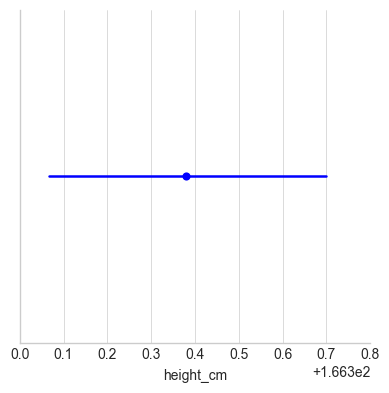

In [36]:
sns.factorplot('height_cm',data=users_df)

TypeError: argument 2 to map() must support iteration

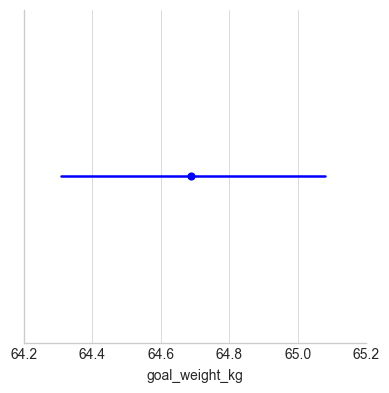

In [35]:
sns.factorplot('goal_weight_kg',data=users_df,hue='age')

In [ ]:
#par taille

# Second data cleaning

In [ ]:
##Some goals are not relevant
##Some height_cm are not relevant
##--> definir le poids "bon pour la santé" (relation entre poids et taille) et le comparer avec les objectifs du user